# Project SQL - Chinook


# Problem Definition

Our goal with this project is to get comfortable with sqlite3 through the chinook sample data set. To explore the dataset in hopes to raise questions and answers.



# Data Collection/Sources

The chinook dataset is available at https://github.com/lerocha/chinook-database, it was imported to our Jupyter notebook using magic commands and connecting to the database.

In [1]:
import sqlite3 as db
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import urllib.request
from pathlib import Path

if not Path("my.db").is_file():
    url = "https://raw.githubusercontent.com/lerocha/chinook-database/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite"
    urllib.request.urlretrieve(url, "my.db")

In [3]:
%%script sqlite3 --column --header my.db
.schema

CREATE TABLE [Album]
(
    [AlbumId] INTEGER  NOT NULL,


    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),
    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE [Artist]
(
    [ArtistId] INTEGER  NOT NULL,
    [Name] NVARCHAR(120),
    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])
);
CREATE TABLE [Customer]
(
    [CustomerId] INTEGER  NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    CONSTRAINT [PK_Customer] PRIMARY KEY  ([CustomerId]),
    FOREIGN KEY ([SupportRepId]) REFERENCES [Employee] ([EmployeeId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE [Employee]
(
    [Emp

# Data Cleaning
For this project there wasn't any data cleaning steps to be taken

# Exploratory Data Analysis


### Basic Queries


Question 1: What tables do we have?

In [4]:
%%script sqlite3 --column --header my.db
.tables

Album          Employee       InvoiceLine    PlaylistTrack
Artist         Genre          MediaType      Track        
Customer       Invoice        Playlist     


In [9]:
%%script sqlite3 --column --header my.db

select *
from Artist
limit 20

ArtistId  Name                       
--------  ---------------------------
1         AC/DC                      
2         Accept                     
3         Aerosmith                  
4         Alanis Morissette          
5         Alice In Chains            
6         Antônio Carlos Jobim       
7         Apocalyptica               
8         Audioslave                 
9         BackBeat                   
10        Billy Cobham               
11        Black Label Society        
12        Black Sabbath              
13        Body Count                 
14        Bruce Dickinson            
15        Buddy Guy                  
16        Caetano Veloso             
17        Chico Buarque              
18        Chico Science & Nação Zumbi
19        Cidade Negra               
20        Cláudio Zoli               


#### WHERE


How many composers was used on the first album?

In [ ]:
%%script sqlite3 --column --header my.db
SELECT count(Composer), Composer
FROM Track
where AlbumID = 1

count(Composer)  Composer                                 
---------------  -----------------------------------------
10               Angus Young, Malcolm Young, Brian Johnson


In [ ]:
%%script sqlite3 --column --header my.db
select Title, ArtistID
from Album
where AlbumID = 1

Title                                  ArtistId
-------------------------------------  --------
For Those About To Rock We Salute You  1       


In [ ]:
%%script sqlite3 --column --header my.db
select *
from Album
limit 10

AlbumId  Title                                  ArtistId
-------  -------------------------------------  --------
1        For Those About To Rock We Salute You  1       
2        Balls to the Wall                      2       
3        Restless and Wild                      2       
4        Let There Be Rock                      1       
5        Big Ones                               3       
6        Jagged Little Pill                     4       
7        Facelift                               5       
8        Warner 25 Anos                         6       
9        Plays Metallica By Four Cellos         7       
10       Audioslave                             8       


What songs/artists in this database have a genre that starts with the letter M?

In [5]:
%%script sqlite3 --column --header my.db

SELECT Track.Name AS Rock_Track_Names, Artist.Name AS ArtistName, Genre.Name AS GenreName
FROM Track
JOIN Album ON Track.AlbumId = Album.AlbumId
JOIN Artist ON Album.ArtistId = Artist.ArtistId
JOIN Genre ON Track.GenreId = Genre.GenreId
WHERE Genre.Name LIKE 'm%'
LIMIT 20
;

Rock_Track_Names           ArtistName           GenreName
-------------------------  -------------------  ---------
Enter Sandman              Apocalyptica         Metal    
Master Of Puppets          Apocalyptica         Metal    
Harvester Of Sorrow        Apocalyptica         Metal    
The Unforgiven             Apocalyptica         Metal    
Sad But True               Apocalyptica         Metal    
Creeping Death             Apocalyptica         Metal    
Wherever I May Roam        Apocalyptica         Metal    
Welcome Home (Sanitarium)  Apocalyptica         Metal    
Intro/ Low Down            Black Label Society  Metal    
13 Years Of Grief          Black Label Society  Metal    
Stronger Than Death        Black Label Society  Metal    
All For You                Black Label Society  Metal    
Super Terrorizer           Black Label Society  Metal    
Phoney Smile Fake Hellos   Black Label Society  Metal    
Lost My Better Half        Black Label Society  Metal    
Bored To Tears

#### AND


What is the total amount spent by customers in each country?

In [ ]:
%%script sqlite3 --column --header my.db

SELECT
    Customer.Country,
    SUM(Total) AS Total_Spending
FROM
    Customer
    JOIN Invoice ON Customer.CustomerId = Invoice.CustomerId
GROUP BY
    Customer.Country
ORDER BY
    Total_Spending DESC;


Country         Total_Spending
--------------  --------------
USA             523.06        
Canada          303.96        
France          195.1         
Brazil          190.1         
Germany         156.48        
United Kingdom  112.86        
Czech Republic  90.24         
Portugal        77.24         
India           75.26         
Chile           46.62         
Ireland         45.62         
Hungary         45.62         
Austria         42.62         
Finland         41.62         
Netherlands     40.62         
Norway          39.62         
Sweden          38.62         
Spain           37.62         
Poland          37.62         
Italy           37.62         
Denmark         37.62         
Belgium         37.62         
Australia       37.62         
Argentina       37.62         


#### LIKE (with % or _ wildcard)


In [ ]:

%%script sqlite3 --column --header my.db
SELECT Genre.Name AS Genre, SUM(InvoiceLine.Quantity * InvoiceLine.UnitPrice) AS TotalSales
FROM InvoiceLine
JOIN Track ON InvoiceLine.TrackId = Track.TrackId
JOIN Genre ON Track.GenreId = Genre.GenreId
GROUP BY Genre.GenreId
ORDER BY TotalSales DESC ;

Genre               TotalSales
------------------  ----------
Rock                826.65    
Latin               382.14    
Metal               261.36    
Alternative & Punk  241.56    
TV Shows            93.53     
Jazz                79.2      
Blues               60.39     
Drama               57.71     
Classical           40.59     
R&B/Soul            40.59     
Sci Fi & Fantasy    39.8      
Reggae              29.7      
Pop                 27.72     
Soundtrack          19.8      
Comedy              17.91     
Hip Hop/Rap         16.83     
Bossa Nova          14.85     
Alternative         13.86     
World               12.87     
Science Fiction     11.94     
Electronica/Dance   11.88     
Heavy Metal         11.88     
Easy Listening      9.9       
Rock And Roll       5.94      


#### BETWEEN


In [ ]:

%%script sqlite3 --column --header my.db
SELECT InvoiceId, CustomerId, Total, BillingState, BillingCity, BillingCountry
FROM Invoice
WHERE Total BETWEEN 15 AND 26
ORDER BY Total DESC;

InvoiceId  CustomerId  Total  BillingState  BillingCity  BillingCountry
---------  ----------  -----  ------------  -----------  --------------
404        6           25.86                Prague       Czech Republic
299        26          23.86  TX            Fort Worth   USA           
96         45          21.86                Budapest     Hungary       
194        46          21.86  Dublin        Dublin       Ireland       
89         7           18.86                Vienne       Austria       
201        25          18.86  WI            Madison      USA           
88         57          17.91                Santiago     Chile         
306        5           16.86                Prague       Czech Republic
313        43          16.86                Dijon        France        
103        24          15.86  IL            Chicago      USA           
208        4           15.86                Oslo         Norway        


#### LIMIT



### Sorting and Grouping


#### ORDER BY


In [ ]:
%%script sqlite3 --column --header my.db
SELECT Name, UnitPrice
FROM Track
ORDER BY UnitPrice Desc
LIMIT 5;

Name                                    UnitPrice
--------------------------------------  ---------
Battlestar Galactica: The Story So Far  1.99     
Occupation / Precipice                  1.99     
Exodus, Pt. 1                           1.99     
Exodus, Pt. 2                           1.99     
Collaborators                           1.99     


#### DISTINCT


What Genres were in our dataset?

In [ ]:
%%script sqlite3 --column --header my.db
SELECT DISTINCT Name
FROM Genre

Name              
------------------
Rock              
Jazz              
Metal             


Alternative & Punk
Rock And Roll     
Blues             
Latin             
Reggae            
Pop               
Soundtrack        
Bossa Nova        
Easy Listening    
Heavy Metal       
R&B/Soul          
Electronica/Dance 
World             
Hip Hop/Rap       
Science Fiction   
TV Shows          
Sci Fi & Fantasy  
Drama             
Comedy            
Alternative       
Classical         
Opera             


#### GROUP BY



How many songs per album?

In [6]:

%%script sqlite3 --column --header my.db
SELECT AlbumId, COUNT(1) AS Number_Of_Songs
FROM Track
GROUP BY AlbumID
ORDER BY Number_Of_Songs DESC
Limit 10;


AlbumId  Number_Of_Songs
-------  ---------------
141      57             
23       34             
73       30             
229      26             
230      25             
251      25             
83       24             
231      24             
253      24             
24       23             


Who had the most albums and how many were there?

In [7]:

%%script sqlite3 --column --header my.db
SELECT
    Artist.Name AS Artist,
    COUNT(Album.AlbumId) AS AlbumCount
FROM
    Artist
JOIN
    Album ON Artist.ArtistId = Album.ArtistId
GROUP BY
    Artist.ArtistId
ORDER BY
    AlbumCount DESC
LIMIT 20;

Artist                   AlbumCount
-----------------------  ----------
Iron Maiden              21        
Led Zeppelin             14        
Deep Purple              11        
Metallica                10        
U2                       10        
Ozzy Osbourne            6         
Pearl Jam                5         
Various Artists          4         
Faith No More            4         
Foo Fighters             4         
Lost                     4         
Van Halen                4         
Audioslave               3         
Gilberto Gil             3         
Queen                    3         
Santana                  3         
Miles Davis              3         
Guns N' Roses            3         
Jamiroquai               3         
Os Paralamas Do Sucesso  3         


### Aggregates


#### MAX

What's the max length of song?

In [ ]:
%%script sqlite3 --column --header my.db

select max(Milliseconds)
from Track

max(Milliseconds)
-----------------
5286953          


#### MIN


What's the cheapest song?

In [ ]:
%%script sqlite3 --column --header my.db
select min (UnitPrice)
from InvoiceLine

min (UnitPrice)
---------------
0.99           


#### SUM


What's the total invoice amount for everything?

In [ ]:

%%script sqlite3 --column --header my.db
select sum(Total)
from Invoice

sum(Total)
----------
2328.6    


#### AVG


What's the average total order for each invoice?

In [ ]:
%%script sqlite3 --column --header my.db
select avg(Total)
from Invoice

avg(Total)      


----------------
5.65194174757282


#### COUNT



How many tracks are in this dataset?

In [ ]:
%%script sqlite3 --column --header my.db
select COUNT(1)
from Track


COUNT(1)
--------
3503    


# Data Visualization/Communication of Results

Our data shows a couple main things, the most popuar genre was Rock, and The United States had the most sales. Iron Maiden had the most albums in the dataset by far.

In [ ]:
conn = db.connect('my.db')

df = pd.read_sql_query('''
SELECT
    Customer.Country,
    SUM(Total) AS Total_Spending
FROM
    Customer
    JOIN Invoice ON Customer.CustomerId = Invoice.CustomerId
GROUP BY
    Customer.Country
ORDER BY
    Total_Spending DESC;
''', conn)

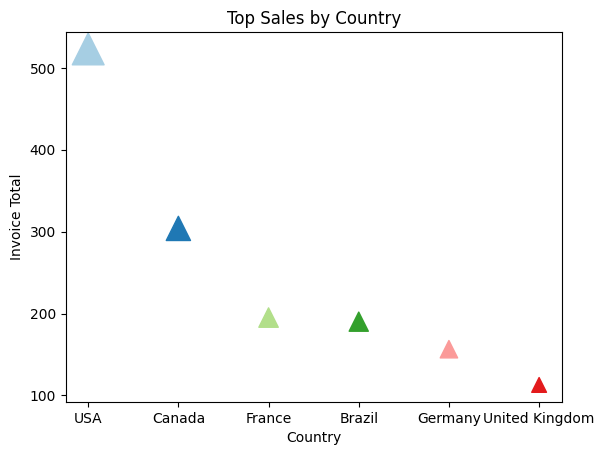

In [ ]:
df = df[0:6]
categories = df['Country']
cmap = plt.get_cmap('Paired')
color_mapping = {category: cmap(i) for i, category in enumerate(categories)}
df['color'] = df['Country'].map(color_mapping)

plt.scatter(df['Country'], df['Total_Spending'],
            marker='^', s=df['Total_Spending'],
            color=df['color'], )  # Increased marker size for visibility
plt.xlabel('Country')
plt.ylabel('Invoice Total')
plt.title('Top Sales by Country')

plt.show()

In [ ]:
df2 = pd.read_sql_query('''
SELECT Genre.Name, SUM(InvoiceLine.Quantity * InvoiceLine.UnitPrice) AS TotalSales
FROM InvoiceLine
JOIN Track ON InvoiceLine.TrackId = Track.TrackId
JOIN Genre ON Track.GenreId = Genre.GenreId
GROUP BY Genre.GenreId
ORDER BY TotalSales DESC ;''', conn)

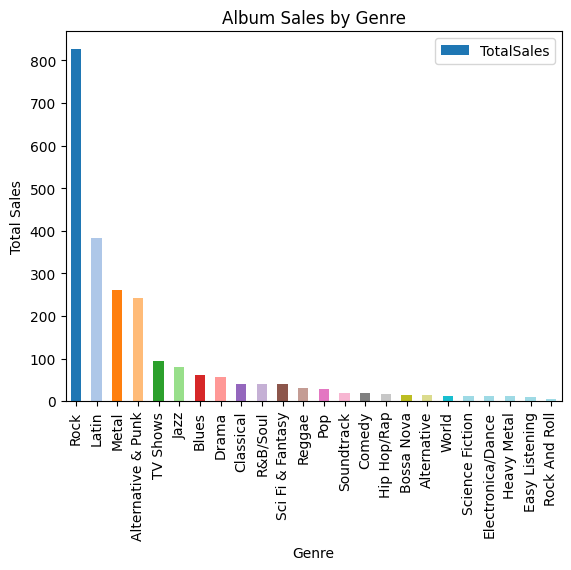

In [ ]:
categories = df2['Name']
cmap = plt.get_cmap('tab20')
color_mapping = {category: cmap(i) for i, category in enumerate(categories)}
df2['color'] = df2['Name'].map(color_mapping)
df2.plot(kind='bar',x='Name',y='TotalSales',
             ylabel='Total Sales',
             xlabel='Genre',
             color=df2['color']
             )
plt.title('Album Sales by Genre');

## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data


In [8]:
%%script sqlite3 --column --header my.db

WITH MonthlySales AS (
    SELECT
        STRFTIME('%Y-%m', i.InvoiceDate) AS Month,
        SUM(i.Total) AS TotalSales
    FROM
        Invoice i
    GROUP BY
        STRFTIME('%Y-%m', i.InvoiceDate)
)
SELECT
    Month,
    TotalSales
FROM
    MonthlySales
ORDER BY
    Month
LIMIT 15    ;

Month    TotalSales
-------  ----------
2009-01  35.64     
2009-02  37.62     
2009-03  37.62     
2009-04  37.62     
2009-05  37.62     
2009-06  37.62     
2009-07  37.62     
2009-08  37.62     
2009-09  37.62     
2009-10  37.62     
2009-11  37.62     
2009-12  37.62     
2010-01  52.62     
2010-02  46.62     
2010-03  44.62     
